In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

In [32]:
comment = """RUNNING - Full Feature Engineering.
This script will run the entire feature engineering steps 
that I have implemented including both location-specific 
and non-location-specific features and generate the following files - 
1. Plots for various analyses (png)
2. Final feature engineered data files (csv & npz)
NOTE: This script needs the output files of 1.0-sm-initial-eda-and-cleaning 
AND it will fail for the downsampled dataset.
"""
print(comment)
from time import sleep
sleep(5)

RUNNING - Full Feature Engineering.
This script will run the entire feature engineering steps 
that I have implemented including both location-specific 
and non-location-specific features and generate the following files - 
1. Plots for various analyses (png)
2. Final final feature engineered data files (csv)


# Obtain Data

In [3]:
data = pd.read_csv('1.0-sm-business_cleaned-1.csv')

In [4]:
data.head()

,stars,business_id,name,neighborhood,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,not_available,phoenix,AZ,85024,33.671375,-112.030017,"coffee & tea, food",1.799341,71.855422,79.254341,8.807229,77.325301
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,not_available,avondale,AZ,85323,33.448106,-112.341302,"mexican, restaurants",1.602060,96.235294,82.525937,5.960784,58.196078
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,not_available,phoenix,AZ,85007,33.479807,-112.091188,"bars, sports bars, dive bars, burgers, nightli...",2.442480,107.390244,83.152809,9.634146,144.167683
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,central,cleveland,OH,44115,41.499989,-81.666375,"fast food, burgers, restaurants",0.698970,25.166667,36.790327,0.833333,2.333333
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,not_available,phoenix,AZ,85033,33.495298,-112.236076,"nightlife, bars, american (traditional), sport...",0.477121,159.750000,79.200507,28.250000,546.250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31758 entries, 0 to 31757
Data columns (total 15 columns):
stars                        31758 non-null float64
business_id                  31758 non-null object
name                         31758 non-null object
neighborhood                 31758 non-null object
city                         31758 non-null object
state                        31758 non-null object
postal_code                  31758 non-null object
latitude                     31758 non-null float64
longitude                    31758 non-null float64
categories                   31758 non-null object
review_count                 31758 non-null float64
mean_user_review_counts      31758 non-null float64
mean_months_since_yelping    31758 non-null float64
mean_user_fans               31758 non-null float64
mean_total_compliments       31758 non-null float64
dtypes: float64(8), object(7)
memory usage: 3.6+ MB


# Feature Engineering

## Cuisine Feature

Identifying the following popular cuisines of food that we'll use for our analysis - 
- Mexican
- American (new or traditional)
- Italian
- Indian
- Chinese
- Mediterranean

In [6]:
cuisines = ['mexican', 'american', 'italian', 'indian', 
            'chinese', 'mediterranean', 'pizza', 'bar']

In [7]:
def get_cuisine(x):
    for cuisine in cuisines:
        if cuisine in x:
            return cuisine
    else:
        return 'other'

In [8]:
data['cuisine'] = data.categories.apply(lambda x: get_cuisine(x))

## Clustering Lat/Lon to identify closeby businesses

Using DBSCAN to cluster businesses within a 2km radius i.e. eps=2kms and parameterizing such that every point gets a cluster, no noise i.e. min_samples=1

In [9]:
coords = data[['latitude', 'longitude']].values

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
kms_per_radian = 6371.0088
epsilon = 2 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')

In [12]:
labels = db.fit_predict(np.radians(coords))

In [13]:
len(set(db.labels_))

443

In [14]:
data['location_cluster'] = labels

In [15]:
data.head()

,stars,business_id,name,neighborhood,city,state,postal_code,latitude,longitude,categories,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,cuisine,location_cluster
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,not_available,phoenix,AZ,85024,33.671375,-112.030017,"coffee & tea, food",1.799341,71.855422,79.254341,8.807229,77.325301,other,0
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,not_available,avondale,AZ,85323,33.448106,-112.341302,"mexican, restaurants",1.602060,96.235294,82.525937,5.960784,58.196078,mexican,0
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,not_available,phoenix,AZ,85007,33.479807,-112.091188,"bars, sports bars, dive bars, burgers, nightli...",2.442480,107.390244,83.152809,9.634146,144.167683,bar,0
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,central,cleveland,OH,44115,41.499989,-81.666375,"fast food, burgers, restaurants",0.698970,25.166667,36.790327,0.833333,2.333333,other,1
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,not_available,phoenix,AZ,85033,33.495298,-112.236076,"nightlife, bars, american (traditional), sport...",0.477121,159.750000,79.200507,28.250000,546.250000,american,0


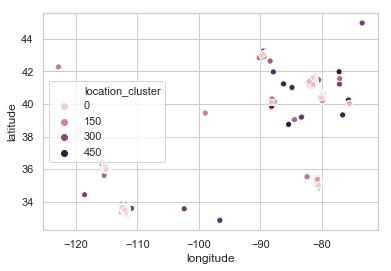

In [17]:
sns_plot = sns.scatterplot(x = "longitude", y = "latitude", hue="location_cluster", data=data)
sns_plot.figure.savefig('clustered-lat-long.png')

In [68]:
# import plotly
# plotly.offline.init_notebook_mode(connected=True)

# import plotly.offline as py
# data['text'] = data['name'] + '' + data['city'] + ', ' + data['state']

# scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
#     [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

# map_data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = data['longitude'],
#         lat = data['latitude'],
#         text = data['text'],
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=1,
#                 color='rgba(102, 102, 102)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = data['location_cluster'],
#             cmax = data['location_cluster'].max(),
#             colorbar=dict(
#                 title="Restaurants on Yelp"
#             )
#         ))]

# layout = dict(
#         title = 'Restaurants on Yelp <br>(Hover for business names)',
#         colorbar = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showland = True,
#             landcolor = "rgb(250, 250, 250)",
#             subunitcolor = "rgb(217, 217, 217)",
#             countrycolor = "rgb(217, 217, 217)",
#             countrywidth = 0.5,
#             subunitwidth = 0.5
#         ),
#     )

# fig = dict( data=map_data, layout=layout )
# py.iplot( fig, validate=False)

## Count of nearby restaurants with similar categories

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vect = TfidfVectorizer(analyzer='word', stop_words='english')

In [20]:
from sklearn.metrics.pairwise import linear_kernel

In [21]:
def count_similar(a):
    sims = np.where(a>0.9)
    return len(sims[0])

In [22]:
def get_sim_counts(temp):
    X = vect.fit_transform(temp.categories)
    cosine_sim = linear_kernel(X)
    sim_counts = np.apply_along_axis(count_similar, 1, cosine_sim)
    return sim_counts

In [23]:
for cluster in data.location_cluster.unique():
    temp = data[data.location_cluster == cluster]
    sim_counts = get_sim_counts(temp)
    data.loc[data.business_id.isin(temp.business_id), 'sim_counts'] = sim_counts

In [24]:
data.sim_counts.describe()

count    31758.000000
mean        36.612129
std         75.727099
min          1.000000
25%          1.000000
50%          4.000000
75%         32.000000
max        462.000000
Name: sim_counts, dtype: float64

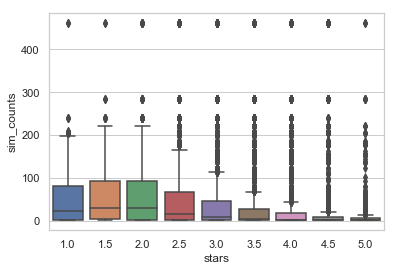

In [26]:
sns_plot = sns.boxplot(x='stars', y='sim_counts', data=data)
sns_plot.figure.savefig('sim-categories-stars-boxplot.png')

## Count of nearby restaurants with similar users visiting

In [27]:
from sklearn.preprocessing import normalize

In [28]:
def get_user_sim_counts(temp):
    X = normalize(temp[['mean_user_review_counts', 'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']])
    cosine_sim = linear_kernel(X)
    user_sim_counts = np.apply_along_axis(count_similar, 1, cosine_sim)
    return user_sim_counts

In [29]:
for cluster in data.location_cluster.unique():
    temp = data[data.location_cluster == cluster]
    user_sim_counts = get_user_sim_counts(temp)
    data.loc[data.business_id.isin(temp.business_id), 'user_sim_counts'] = user_sim_counts

In [30]:
data.user_sim_counts.describe()

count    31758.000000
mean      2357.387430
std       1712.469461
min          1.000000
25%        847.000000
50%       1960.000000
75%       4141.000000
max       5235.000000
Name: user_sim_counts, dtype: float64

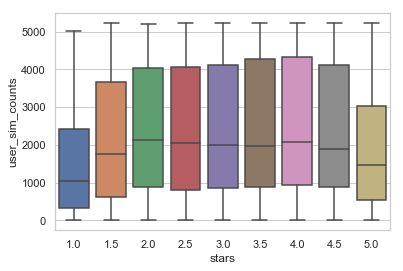

In [31]:
sns_plot = sns.boxplot(x='stars', y='user_sim_counts', data=data)
sns_plot.figure.savefig('sim-users-stars-boxplot.png')

## Exploding categories into separate columns

In [29]:
explode = pd.DataFrame(data.categories.str.split(',').tolist(), index = data.business_id).stack()

In [30]:
explode = explode.reset_index()[[0, 'business_id']]

In [31]:
explode.columns = ['category', 'business_id']

In [32]:
explode.head()

,category,business_id
0,coffee & tea,45bWSZtniwPRiqlivpS8Og
1,food,45bWSZtniwPRiqlivpS8Og
2,mexican,8-NRKkPY1UiFXW20WXKiXg
3,restaurants,8-NRKkPY1UiFXW20WXKiXg
4,bars,_c3ixq9jYKxhLUB0czi0ug


In [33]:
explode['present'] = 1

In [34]:
explode = explode.groupby(['business_id','category'])['present'].mean().unstack(fill_value=0)

In [35]:
explode.head()

category,& probates,acai bowls,accessories,accountants,active life,acupuncture,adult,adult education,adult entertainment,advertising,...,wholesalers,wine bars,wine tasting room,wine tours,wineries,women's clothing,wraps,yelp events,yoga,zoos
business_id,,,,,,,,,,,,,,,,,,,,,
--7zmmkVg-IMGaXbuVd0SQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--FBCX-N37CMYDfs790Bnw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--GM_ORV2cYS-h38DSaCLw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--I7YYLada0tSLkORTHb5Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
explode.columns.name = None

In [37]:
explode = explode.reset_index()

In [38]:
explode.head()

,business_id,& probates,acai bowls,accessories,accountants,active life,acupuncture,adult,adult education,adult entertainment,...,wholesalers,wine bars,wine tasting room,wine tours,wineries,women's clothing,wraps,yelp events,yoga,zoos
0,--7zmmkVg-IMGaXbuVd0SQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,--FBCX-N37CMYDfs790Bnw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,--GM_ORV2cYS-h38DSaCLw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,--I7YYLada0tSLkORTHb5Q,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data = pd.merge(data, explode, left_on='business_id', right_on='business_id', how='left')

In [40]:
data = data.drop('categories', axis=1)

In [41]:
data.head()

,stars,business_id,name,neighborhood,city,state,postal_code,latitude,longitude,review_count,...,wholesalers,wine bars,wine tasting room,wine tours,wineries,women's clothing,wraps,yelp events,yoga,zoos
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,not_available,phoenix,AZ,85024,33.671375,-112.030017,1.799341,...,0,0,0,0,0,0,0,0,0,0
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,not_available,avondale,AZ,85323,33.448106,-112.341302,1.602060,...,0,0,0,0,0,0,0,0,0,0
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,not_available,phoenix,AZ,85007,33.479807,-112.091188,2.442480,...,0,0,0,0,0,0,0,0,0,0
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,central,cleveland,OH,44115,41.499989,-81.666375,0.698970,...,0,0,0,0,0,0,0,0,0,0
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,not_available,phoenix,AZ,85033,33.495298,-112.236076,0.477121,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31758 entries, 0 to 31757
Columns: 1169 entries, stars to zoos
dtypes: float64(10), int64(1152), object(7)
memory usage: 283.5+ MB


## Transforming Categorical to Dummies

In [43]:
data = pd.get_dummies(data, columns=['neighborhood', 'city', 'state', 'postal_code', 'cuisine'])

In [44]:
data.head()

,stars,business_id,name,latitude,longitude,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,...,postal_code_not_available,cuisine_american,cuisine_bar,cuisine_chinese,cuisine_indian,cuisine_italian,cuisine_mediterranean,cuisine_mexican,cuisine_other,cuisine_pizza
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,33.671375,-112.030017,1.799341,71.855422,79.254341,8.807229,77.325301,...,0,0,0,0,0,0,0,0,1,0
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,33.448106,-112.341302,1.602060,96.235294,82.525937,5.960784,58.196078,...,0,0,0,0,0,0,0,1,0,0
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,33.479807,-112.091188,2.442480,107.390244,83.152809,9.634146,144.167683,...,0,0,1,0,0,0,0,0,0,0
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,41.499989,-81.666375,0.698970,25.166667,36.790327,0.833333,2.333333,...,0,0,0,0,0,0,0,0,1,0
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,33.495298,-112.236076,0.477121,159.750000,79.200507,28.250000,546.250000,...,0,1,0,0,0,0,0,0,0,0


## Bucketizing review counts

Bucketizing review counts into 10 quantile buckets

In [45]:
data.review_count.describe()

count    31758.000000
mean         1.473732
std          0.624941
min          0.477121
25%          0.954243
50%          1.447158
75%          1.924279
max          3.901349
Name: review_count, dtype: float64

In [46]:
data['review_count_bucket'] = pd.qcut(data.review_count, 10)

In [47]:
data.head()

,stars,business_id,name,latitude,longitude,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,...,cuisine_american,cuisine_bar,cuisine_chinese,cuisine_indian,cuisine_italian,cuisine_mediterranean,cuisine_mexican,cuisine_other,cuisine_pizza,review_count_bucket
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,33.671375,-112.030017,1.799341,71.855422,79.254341,8.807229,77.325301,...,0,0,0,0,0,0,0,1,0,"(1.623, 1.82]"
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,33.448106,-112.341302,1.602060,96.235294,82.525937,5.960784,58.196078,...,0,0,0,0,0,0,1,0,0,"(1.447, 1.623]"
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,33.479807,-112.091188,2.442480,107.390244,83.152809,9.634146,144.167683,...,0,1,0,0,0,0,0,0,0,"(2.326, 3.901]"
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,41.499989,-81.666375,0.698970,25.166667,36.790327,0.833333,2.333333,...,0,0,0,0,0,0,0,1,0,"(0.602, 0.845]"
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,33.495298,-112.236076,0.477121,159.750000,79.200507,28.250000,546.250000,...,1,0,0,0,0,0,0,0,0,"(0.476, 0.602]"


In [48]:
data = pd.get_dummies(data, columns=['review_count_bucket'])

In [49]:
data.head()

,stars,business_id,name,latitude,longitude,review_count,mean_user_review_counts,mean_months_since_yelping,mean_user_fans,mean_total_compliments,...,"review_count_bucket_(0.476, 0.602]","review_count_bucket_(0.602, 0.845]","review_count_bucket_(0.845, 1.079]","review_count_bucket_(1.079, 1.255]","review_count_bucket_(1.255, 1.447]","review_count_bucket_(1.447, 1.623]","review_count_bucket_(1.623, 1.82]","review_count_bucket_(1.82, 2.041]","review_count_bucket_(2.041, 2.326]","review_count_bucket_(2.326, 3.901]"
0,4.0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf,33.671375,-112.030017,1.799341,71.855422,79.254341,8.807229,77.325301,...,0,0,0,0,0,0,1,0,0,0
1,2.5,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food,33.448106,-112.341302,1.602060,96.235294,82.525937,5.960784,58.196078,...,0,0,0,0,0,1,0,0,0,0
2,4.0,_c3ixq9jYKxhLUB0czi0ug,original hamburger works,33.479807,-112.091188,2.442480,107.390244,83.152809,9.634146,144.167683,...,0,0,0,0,0,0,0,0,0,1
3,3.0,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers,41.499989,-81.666375,0.698970,25.166667,36.790327,0.833333,2.333333,...,0,1,0,0,0,0,0,0,0,0
4,2.5,3ByGQOVgds2YEu6kzl-XEQ,rib shop,33.495298,-112.236076,0.477121,159.750000,79.200507,28.250000,546.250000,...,1,0,0,0,0,0,0,0,0,0


# Exporting transformed data for Modelling

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31758 entries, 0 to 31757
Columns: 2310 entries, stars to review_count_bucket_(2.326, 3.901]
dtypes: float64(10), int64(1152), object(2), uint8(1146)
memory usage: 317.0+ MB


In [51]:
data.stars = (data.stars * 2).astype(np.int)

In [52]:
data.stars.value_counts()

8     7600
7     6719
6     4924
9     4588
5     3265
4     2008
10    1577
3      815
2      262
Name: stars, dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31758 entries, 0 to 31757
Columns: 2310 entries, stars to review_count_bucket_(2.326, 3.901]
dtypes: float64(9), int64(1153), object(2), uint8(1146)
memory usage: 317.0+ MB


In [54]:
data.select_dtypes(include='object').head()

,business_id,name
0,45bWSZtniwPRiqlivpS8Og,the coffee bean & tea leaf
1,8-NRKkPY1UiFXW20WXKiXg,filiberto's mexican food
2,_c3ixq9jYKxhLUB0czi0ug,original hamburger works
3,gJ5xSt6147gkcZ9Es0WxlA,rally's hamburgers
4,3ByGQOVgds2YEu6kzl-XEQ,rib shop


In [55]:
from scipy.sparse import csr_matrix, save_npz

In [56]:
csr = csr_matrix(data.drop(['name','business_id','stars'], axis=1).values)

In [57]:
save_npz(matrix=csr, file='1.1-sm-feature-engineered-1.npz')

In [58]:
data.stars.to_csv('1.1-sm-feature-engineered-1-labels.csv', index=False, header=True)

In [59]:
data.drop(['name','business_id','stars'], axis=1).to_csv('1.1-sm-feature-engineered-1.csv', index=False)